## 8.1	文本数据分析工具

### 8.1.2 安装jieba和NLTK语料库

In [1]:
import nltk

In [5]:
nltk.download()    # 打开NLTK下载器

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
from nltk.corpus import brown       # 导入brown库
brown.words()                          # 查看brown库中所有的单词

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [5]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [6]:
'brown中一共有{}个句子'.format(len(brown.sents()))

'brown中一共有57340个句子'

In [7]:
'brown中一共有{}个单词'.format(len(brown.words()))

'brown中一共有1161192个单词'

## 8.2	文本预处理

### 8.2.2	分词

In [9]:
# 原始英文文本
sentence = 'Python is a structured and powerful object-oriented programming language.'
# 将句子切分为单词
words = nltk.word_tokenize(sentence)
words

['Python',
 'is',
 'a',
 'structured',
 'and',
 'powerful',
 'object-oriented',
 'programming',
 'language',
 '.']

In [10]:
import jieba
# 原始中文文本
sentence = '传智专修学院推出颠覆式办学模式'
# 全模式划分中文句子
terms_list = jieba.cut(sentence, cut_all=True)
print('【全模式】：'+ '/'.join(terms_list))
# 精确模式划分中文句子
terms_list = jieba.cut(sentence, cut_all=False)
print('【精确模式】：'+ '/'.join(terms_list))

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\itcast\AppData\Local\Temp\jieba.cache
Loading model cost 0.980 seconds.
Prefix dict has been built successfully.


【全模式】：传/智/专修/修学/学院/推出/颠覆/式/办学/模式
【精确模式】：传智/专修/学院/推出/颠覆/式/办学/模式


### 8.2.3	词性标注

In [14]:
words = nltk.word_tokenize('Python is a structured and powerful object-oriented programming language.')
# 为列表中的每个单词标注词性
nltk.pos_tag(words)

[('Python', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('structured', 'JJ'),
 ('and', 'CC'),
 ('powerful', 'JJ'),
 ('object-oriented', 'JJ'),
 ('programming', 'NN'),
 ('language', 'NN'),
 ('.', '.')]

### 8.2.4	词形归一化

In [15]:
# 导入nltk.stem模块的波特词干提取器
from nltk.stem.porter import PorterStemmer
# 按照波特算法提取词干
porter_stem = PorterStemmer()
porter_stem.stem('watched')

'watch'

In [16]:
porter_stem.stem('watching')

'watch'

In [17]:
from nltk.stem.lancaster import LancasterStemmer
lancaster_stem = LancasterStemmer()
# 按照兰卡斯特算法提取词干
lancaster_stem.stem('jumped')

'jump'

In [18]:
lancaster_stem.stem('jumping')

'jump'

In [19]:
from nltk.stem import SnowballStemmer
snowball_stem = SnowballStemmer('english')
snowball_stem.stem('listened')

'listen'

In [20]:
snowball_stem.stem('listening')

'listen'

In [24]:
from nltk.stem import WordNetLemmatizer
# 创建WordNetLemmatizer对象
wordnet_lem = WordNetLemmatizer()
# 还原books单词的基本形式
wordnet_lem.lemmatize('books')

'book'

In [25]:
wordnet_lem.lemmatize('went')

'went'

In [26]:
wordnet_lem.lemmatize('did')

'did'

In [27]:
# 指定went的词性为动词
wordnet_lem.lemmatize('went', pos='v')

'go'

In [28]:
wordnet_lem.lemmatize('did', pos='v')

'do'

### 8.2.5	删除停用词

In [30]:
from nltk.corpus import stopwords
# 原始文本
sentence = 'Python is a structured and powerful object-oriented programming language.'
# 将英文语句按空格划分为多个单词
words = nltk.word_tokenize(sentence)
words

['Python',
 'is',
 'a',
 'structured',
 'and',
 'powerful',
 'object-oriented',
 'programming',
 'language',
 '.']

In [32]:
# 获取英文停用词列表
stop_words = stopwords.words('english')
# 定义一个空列表
remain_words = []
# 如果发现单词不包含在停用词列表中，就保存在remain_words中
for word in words:
     if word not in stop_words:
            remain_words.append(word)
remain_words

['Python',
 'structured',
 'powerful',
 'object-oriented',
 'programming',
 'language',
 '.']

## 8.3	文本情感分析

In [33]:
# 训练的文本
text_one = 'This is a wonderful book'
text_two = 'I like reading this book very much.'
text_thr = 'This book reads well.'
text_fou = 'This book is not good.'
text_fiv = 'This is a very bad book.'

In [34]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.classify import NaiveBayesClassifier
def pret_text(text):
    # 对文本进行分词
    words = nltk.word_tokenize(text)
    # 词形还原
    wordnet_lematizer = WordNetLemmatizer()    
    words = [wordnet_lematizer.lemmatize(word) for word in words]
    # 删除停用词
    remain_words = [word for word in words if word not in stopwords.words('english')]
    # True 表示该词在文本中
    return {word: True for word in remain_words}

In [35]:
# 构建训练文本，设定情感分值
train_data = [[pret_text(text_one), 1],
              [pret_text(text_two), 1],
              [pret_text(text_thr), 1],
              [pret_text(text_fou), -1],
              [pret_text(text_fiv), -1]]
# 训练模型
demo_model = NaiveBayesClassifier.train(train_data)

In [36]:
# 测试模型
test_text1 = 'I like this movie very much'
demo_model.classify(pret_text(test_text1))

1

In [37]:
test_text2 = 'The film is very bad'
demo_model.classify(pret_text(test_text2))

-1

In [38]:
test_text3 = 'The film is terrible'
demo_model.classify(pret_text(test_text3))

1

## 8.4	文本相似度

In [1]:
import nltk
from nltk import FreqDist
text1 = 'John likes to watch movies'
text2 = 'John also likes to watch football games'
all_text = text1 +" " + text2
# 分词
words = nltk.word_tokenize(all_text)
# 创建FreqDist对象，记录每个单词出现的频率
freq_dist = FreqDist(words)
freq_dist

FreqDist({'John': 2, 'likes': 2, 'to': 2, 'watch': 2, 'movies': 1, 'also': 1, 'football': 1, 'games': 1})

In [2]:
freq_dist['John']

2

In [3]:
# 取出n个常用的单词
n = 5
# 返回常用单词列表
most_common_words = freq_dist.most_common(n)
most_common_words

[('John', 2), ('likes', 2), ('to', 2), ('watch', 2), ('movies', 1)]

In [4]:
# 查找常用单词的位置
def find_position(common_words):   
    result = {}
    pos = 0
    for word in common_words:
        result[word[0]] = pos
        pos += 1
    return result
# 记录常用单词的位置
pos_dict = find_position(most_common_words)
pos_dict

{'John': 0, 'likes': 1, 'to': 2, 'watch': 3, 'movies': 4}

In [5]:
def text_to_vector(words):
    # 初始化向量
    freq_vec = [0] * n
    # 在“常用单词列表”上计算词频
    for word in words:
        if word in list(pos_dict.keys()):
            freq_vec[pos_dict[word]] += 1
    return freq_vec

In [6]:
# 词频向量
vector1 = text_to_vector(nltk.word_tokenize(text1))
vector1

[1, 1, 1, 1, 1]

In [7]:
vector2 = text_to_vector(nltk.word_tokenize(text2))
vector2

[1, 1, 1, 1, 0]

In [8]:
from nltk.cluster.util import cosine_distance
1 - cosine_distance(vector1, vector2)

0.8944271909999159

## 8.5	文本分类

In [9]:
import nltk
from nltk.corpus import names
import random
# 收集数据，用一部分数据来训练，用一部分数据用来测试
names = [(name,'male') for name in names.words('male.txt')] \
          + [(name,'female') for name in names.words('female.txt')]
# 将names的所有元素随机排序
random.shuffle(names)
names

[('Jewell', 'female'),
 ('Agata', 'female'),
 ('Hetti', 'female'),
 ('Domenic', 'male'),
 ('Antonella', 'female'),
 ('Laila', 'female'),
 ('Fidel', 'male'),
 ('Karna', 'female'),
 ('Ida', 'female'),
 ('Irita', 'female'),
 ('Windy', 'female'),
 ('Sofie', 'female'),
 ('Jory', 'male'),
 ('Elladine', 'female'),
 ('Giffy', 'male'),
 ('Wandis', 'female'),
 ('Shannah', 'female'),
 ('Cresa', 'female'),
 ('Heinz', 'male'),
 ('Allene', 'female'),
 ('Sigrid', 'female'),
 ('Levy', 'male'),
 ('Sephira', 'female'),
 ('Elsi', 'female'),
 ('Win', 'male'),
 ('Goldia', 'female'),
 ('Sherilyn', 'female'),
 ('Elinor', 'female'),
 ('Hillary', 'female'),
 ('Petrina', 'female'),
 ('Horatius', 'male'),
 ('Cynthia', 'female'),
 ('Margarethe', 'female'),
 ('Wallie', 'female'),
 ('Ailey', 'female'),
 ('Vilhelmina', 'female'),
 ('Kellie', 'female'),
 ('Gertie', 'female'),
 ('Ruthy', 'female'),
 ('Randall', 'male'),
 ('Allah', 'male'),
 ('Raleigh', 'male'),
 ('Angel', 'female'),
 ('Herold', 'male'),
 ('Broderic', 

In [10]:
# 特征提取器
def gender_features(word): 
    # 特征就是最后一个字母和倒数第二个字母
    return {'最后一个字母':word[-1],'倒数第二个字母':word[-2]}
features = [(gender_features(n),g) for (n,g) in names]
features

[({'最后一个字母': 'l', '倒数第二个字母': 'l'}, 'female'),
 ({'最后一个字母': 'a', '倒数第二个字母': 't'}, 'female'),
 ({'最后一个字母': 'i', '倒数第二个字母': 't'}, 'female'),
 ({'最后一个字母': 'c', '倒数第二个字母': 'i'}, 'male'),
 ({'最后一个字母': 'a', '倒数第二个字母': 'l'}, 'female'),
 ({'最后一个字母': 'a', '倒数第二个字母': 'l'}, 'female'),
 ({'最后一个字母': 'l', '倒数第二个字母': 'e'}, 'male'),
 ({'最后一个字母': 'a', '倒数第二个字母': 'n'}, 'female'),
 ({'最后一个字母': 'a', '倒数第二个字母': 'd'}, 'female'),
 ({'最后一个字母': 'a', '倒数第二个字母': 't'}, 'female'),
 ({'最后一个字母': 'y', '倒数第二个字母': 'd'}, 'female'),
 ({'最后一个字母': 'e', '倒数第二个字母': 'i'}, 'female'),
 ({'最后一个字母': 'y', '倒数第二个字母': 'r'}, 'male'),
 ({'最后一个字母': 'e', '倒数第二个字母': 'n'}, 'female'),
 ({'最后一个字母': 'y', '倒数第二个字母': 'f'}, 'male'),
 ({'最后一个字母': 's', '倒数第二个字母': 'i'}, 'female'),
 ({'最后一个字母': 'h', '倒数第二个字母': 'a'}, 'female'),
 ({'最后一个字母': 'a', '倒数第二个字母': 's'}, 'female'),
 ({'最后一个字母': 'z', '倒数第二个字母': 'n'}, 'male'),
 ({'最后一个字母': 'e', '倒数第二个字母': 'n'}, 'female'),
 ({'最后一个字母': 'd', '倒数第二个字母': 'i'}, 'female'),
 ({'最后一个字母': 'y', '倒数第二个字母': 'v'}, 'male'),


In [50]:
train, test = features[500:],features[:500] 
# 使用训练集训练模型
classifier = nltk.NaiveBayesClassifier.train(train)

In [51]:
# 通过测试集来估计分类器的准确性
nltk.classify.accuracy(classifier, test)

0.778

In [52]:
# 如果一个人的名字是‘Ella，那么这个人是男还是女
classifier.classify({'last_letter': 'Ella'})

'female'

In [53]:
# 检查分类器，找出最能够区分名字性别的特征值
classifier.show_most_informative_features(5)

Most Informative Features
                  最后一个字母 = 'a'            female : male   =     35.6 : 1.0
                  最后一个字母 = 'k'              male : female =     32.3 : 1.0
                  最后一个字母 = 'v'              male : female =     17.6 : 1.0
                  最后一个字母 = 'f'              male : female =     16.7 : 1.0
                  最后一个字母 = 'p'              male : female =     10.5 : 1.0


### 多学一招：TF-IDF算法

In [54]:
import nltk.corpus
from nltk.text import TextCollection
# 首先，把所有的文档放到TextCollection类中
# 这个类会自动断句，做统计，做计算
corpus = TextCollection(['this is sentence one',
                         'this is sentence two',
                         'this is sentence three'])

In [55]:
# 直接就能算出tf_idf
corpus.tf_idf('this', 'this is sentence four')

0.0

## 8.6	案例：商品评论分析

### 8.6.2 数据准备

In [11]:
import pandas as pd
from nltk import FreqDist
import jieba
file_path = open(r'C:\Users\itcast\Desktop\商品评价信息.csv')
file_data = pd.read_csv(file_path)
file_data

ModuleNotFoundError: No module named 'jieba'

### 8.6.3 案例实现

In [60]:
# 删除重复的评价信息
file_data.drop(file_data[file_data['评价信息']=='此用户没有填写评价。'].index, inplace=True)
file_data

,评价信息
0,穿上挺舒服的，是我有史以来在网上买的最漂亮最舒服的一件衣服了，面料也挺不错的，建议大家喜欢就...
1,衣服上身很舒服、布料也好、就是裤子不是很大，如果裤子能改进点就完美了;
2,给男朋友买了一套，很好哦。我很喜欢，晒图给大家做一个参考，穿的很帅气，我很满意，图案很个性，...
3,质量很好。就是码子偏大。老公体重180身高175穿3XL的有点大。要是喜欢穿贴身的建议买小一...
4,"在网上买东西了,好厉害好东西便宜而且质量好，物美价廉买的放心用的开心，感觉都买上瘾了"
...,...
1188,还好
1189,不错，
1190,差
1198,呃呃


In [62]:
# 使用精确模式划分中文句子
cut_words = jieba.lcut(str(file_data['评价信息'].values), cut_all = False)
cut_words

['[',
 "'",
 '穿',
 '上',
 '挺舒服',
 '的',
 '，',
 '是',
 '我',
 '有史以来',
 '在',
 '网上',
 '买',
 '的',
 '最',
 '漂亮',
 '最舒服',
 '的',
 '一件',
 '衣服',
 '了',
 '，',
 '面料',
 '也',
 '挺不错',
 '的',
 '，',
 '建议',
 '大家',
 '喜欢',
 '就',
 '立即',
 '购买',
 '吧',
 '?',
 '?',
 "'",
 '\n',
 ' ',
 "'",
 '衣服',
 '上身',
 '很',
 '舒服',
 '、',
 '布料',
 '也好',
 '、',
 '就是',
 '裤子',
 '不是',
 '很大',
 '，',
 '如果',
 '裤子',
 '能',
 '改进',
 '点',
 '就',
 '完美',
 '了',
 ';',
 "'",
 '\n',
 ' ',
 "'",
 '给',
 '男朋友',
 '买',
 '了',
 '一套',
 '，',
 '很',
 '好',
 '哦',
 '。',
 '我',
 '很',
 '喜欢',
 '，',
 '晒图',
 '给',
 '大家',
 '做',
 '一个',
 '参考',
 '，',
 '穿',
 '的',
 '很',
 '帅气',
 '，',
 '我',
 '很',
 '满意',
 '，',
 '图案',
 '很',
 '个性',
 '，',
 '比较',
 '符合',
 '他',
 '高个子',
 '的',
 '气质',
 ' ',
 '哈哈哈哈',
 '，',
 '感觉',
 '物美价廉',
 '，',
 '棒棒',
 '哒',
 '，',
 '衣服',
 '穿着',
 '很',
 '舒适',
 '，',
 '也',
 '不',
 '掉色',
 '，',
 '不会',
 '闷',
 '着',
 '，',
 '质量',
 '果然',
 '不错',
 '，',
 '很',
 '适合',
 '运动',
 '的',
 '时候',
 '穿',
 '，',
 '男朋友',
 '简直',
 '很',
 '开心',
 '，',
 '还会来',
 '回购',
 '的',
 '，',
 '一件',
 '是',
 '不够',
 '的',
 "'",
 '\

In [63]:
# 加载停用词表
file_path = open(r'C:\Users\itcast\Desktop\停用词表.txt', encoding='utf-8')
stop_words = file_path.read()
# 新建一个空列表，用于存储删除停用词后的数据
new_data = []
for word in cut_words:
    if word not in stop_words:
        new_data.append(word)
new_data

['挺舒服',
 '有史以来',
 '网上',
 '买',
 '漂亮',
 '最舒服',
 '衣服',
 '面料',
 '挺不错',
 '建议',
 '喜欢',
 '立即',
 '购买',
 '衣服',
 '上身',
 '舒服',
 '布料',
 '裤子',
 '很大',
 '裤子',
 '改进',
 '完美',
 '男朋友',
 '买',
 '喜欢',
 '晒图',
 '做',
 '参考',
 '帅气',
 '满意',
 '图案',
 '个性',
 '比较',
 '符合',
 '高个子',
 '气质',
 '感觉',
 '物美价廉',
 '棒棒',
 '衣服',
 '穿着',
 '舒适',
 '掉色',
 '不会',
 '闷',
 '质量',
 '不错',
 '适合',
 '运动',
 '男朋友',
 '简直',
 '开心',
 '还会来',
 '回购',
 '不够',
 '差',
 '大小',
 '合适',
 '摸',
 '比较',
 '薄',
 '送']

In [64]:
# 词频统计
freq_list = FreqDist(new_data)
# 返回词语列表
most_common_words = freq_list.most_common()
most_common_words

[('衣服', 3),
 ('买', 2),
 ('喜欢', 2),
 ('裤子', 2),
 ('男朋友', 2),
 ('比较', 2),
 ('挺舒服', 1),
 ('有史以来', 1),
 ('网上', 1),
 ('漂亮', 1),
 ('最舒服', 1),
 ('面料', 1),
 ('挺不错', 1),
 ('建议', 1),
 ('立即', 1),
 ('购买', 1),
 ('上身', 1),
 ('舒服', 1),
 ('布料', 1),
 ('很大', 1),
 ('改进', 1),
 ('完美', 1),
 ('晒图', 1),
 ('做', 1),
 ('参考', 1),
 ('帅气', 1),
 ('满意', 1),
 ('图案', 1),
 ('个性', 1),
 ('符合', 1),
 ('高个子', 1),
 ('气质', 1),
 ('感觉', 1),
 ('物美价廉', 1),
 ('棒棒', 1),
 ('穿着', 1),
 ('舒适', 1),
 ('掉色', 1),
 ('不会', 1),
 ('闷', 1),
 ('质量', 1),
 ('不错', 1),
 ('适合', 1),
 ('运动', 1),
 ('简直', 1),
 ('开心', 1),
 ('还会来', 1),
 ('回购', 1),
 ('不够', 1),
 ('差', 1),
 ('大小', 1),
 ('合适', 1),
 ('摸', 1),
 ('薄', 1),
 ('送', 1)]

In [66]:
!pip install wordcloud

     ------------------------------------- 153.1/153.1 kB 43.3 kB/s eta 0:00:00


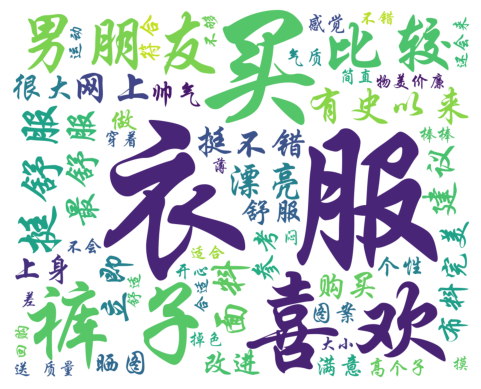

In [72]:
# 导入所需要使用的包
from matplotlib import pyplot as plt
from wordcloud import WordCloud 
# 词云显示
font = r'C:\Windows\Fonts\STXINGKA.TTF'  # 华文行楷
wc = WordCloud(font_path = font, background_color = 'white',width = 1000, height = 800).generate(" ".join(new_data))
plt.imshow(wc)   
plt.axis('off')  # 不显示坐标轴
plt.show()       # 显示图片